## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 1 EXERCISE ANSWERS ##
#### Exercise 1 ####


## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 2 EXERCISE ANSWERS ##
#### Exercise 2 ####


## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 3 EXERCISE ANSWERS ##
#### Exercise 3 ####


## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 4 EXERCISE ANSWERS ##
#### Exercise 4 ####
#### Exercise 1
#### Task 1
##### Import the packages required to analyze data with log-log models, log-lin models, polynomial models, and interactions in the predictor variables.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Set 'main_dir' to location of the project folder
from pathlib import Path



#### Task 2
##### Load `beer-sold-by-price.csv` and save as `ex_data_loglog`.
##### The data consists of 52 weeks of cases sold and the price per case of 18-packs of beer at a small chain of supermarkets. 
##### We want to build a regression model that can predict `quantity of cases sold` according to the changes in the `price`.
##### Check the shape of the data, print the first few rows, and check for any missing values. 
##### For convenience, change the column names from `PRICE 18PK`, `CASES 18PK` to `Price`, `Quantity`.
##### Lastly, sort the dataframe by `Price`.
#### Result:


In [2]:
ex_data_loglog = pd.read_csv('beer-sold-by-price.csv')
ex_data_loglog.shape
ex_data_loglog.head()
ex_data_loglog.isnull().values.any()
ex_data_loglog=ex_data_loglog.rename(columns={'PRICE 18PK':'Price', 'CASES 18PK':'Quantity'})
ex_data_loglog.head()
ex_data_loglog.sort_values(by=['Price'], inplace = True)


#### Task 3
##### Transform the values of our predictor and target variable to the log of the actual values. 
##### Name the log values column as `price_log` and `quantity_log`.
##### Print out the first few rows to check.
#### Result:


In [3]:
ex_data_loglog['price_log'] = np.log(ex_data_loglog['Price'])
ex_data_loglog['quantity_log'] = np.log(ex_data_loglog['Quantity'])
ex_data_loglog.head()


,Price,Quantity,price_log,quantity_log
50,13.26,493,2.584752,6.200509
47,13.45,741,2.598979,6.608001
28,13.49,890,2.601949,6.791221
31,13.67,775,2.615204,6.652863
46,13.76,523,2.621766,6.259581


#### Task 4
##### Add a constant to the dataframe.
#### Result:


In [4]:
ex_data_loglog = sm.add_constant(ex_data_loglog)
ex_data_loglog.head()


,const,Price,Quantity,price_log,quantity_log
50,1.0,13.26,493,2.584752,6.200509
47,1.0,13.45,741,2.598979,6.608001
28,1.0,13.49,890,2.601949,6.791221
31,1.0,13.67,775,2.615204,6.652863
46,1.0,13.76,523,2.621766,6.259581


#### Task 5
##### Fit the model using `sm.OLS` and pass the columns we transformed to log in the previous tasks.
##### Name the model `ex_loglog`.
#### Result:


In [5]:
ex_loglog = sm.OLS(ex_data_loglog['quantity_log'], ex_data_loglog.loc[:,['const','price_log']]).fit()


#### Task 6
##### Use the fitted log-log model to predict. 
##### Save the predictions as `ex_prediction_loglog`.
##### Take a look at the first 10 rows of the predictions.
#### Result:


In [6]:
ex_prediction_loglog = ex_loglog.predict(ex_data_loglog.loc[:,['const','price_log']])
ex_prediction_loglog[0:10]


50    6.499954
47    6.404558
28    6.384646
31    6.295769
46    6.251768
39    6.237165
27    6.237165
42    6.208054
16    6.198378
12    6.198378
dtype: float64

#### Task 7
##### Exponentiate the predictions and save as `ex_prediction`.
##### Print the first 10 rows of `ex_prediction`.
#### Result:


In [7]:
ex_prediction = np.exp(ex_prediction_loglog)
ex_prediction[0:10]


50    665.110708
47    604.594284
28    592.674929
31    542.272478
46    518.929366
39    511.406497
27    511.406497
42    496.733573
16    491.950537
12    491.950537
dtype: float64

#### Task 8
##### Create a scatterplot of the actual values of `quantity` and the predicted values of `quantity`. 
##### Plot the actual quantity as the scatter points and the predicted quantity as a red line to compare.
#### Result:


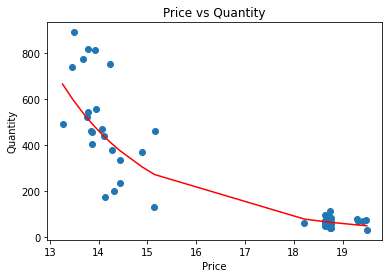

In [8]:
plt.scatter(ex_data_loglog['Price'], ex_data_loglog['Quantity'])
plt.plot(ex_data_loglog['Price'], ex_prediction, 'red')
plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()


#### Task 9
##### Get the residuals and put them into a dataframe called `ex_loglog_results`, along with the actual values of `quantity` and the exponentiated predictions of `quantity`.
##### Using the RMSE function, get the RMSE of our log-log model.


In [9]:
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())


#### Result:


In [10]:
actual = ex_data_loglog['Quantity']
prediction = ex_prediction
residuals = actual - prediction
ex_loglog_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
rmse(ex_loglog_results['predicted'],ex_loglog_results['actual'])


118.24594924491831

#### Task 10
##### Build a standard linear model with the dataset, and get a plot of `actual vs.predicted`.
##### Compare the plot with our previous log-log model plot.
#### Result:


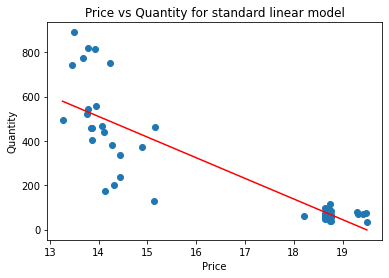

In [11]:
# Fit the model.
model_lin = sm.OLS(ex_data_loglog['Quantity'], ex_data_loglog.loc[:,['const','Price']]).fit()
prediction = model_lin.predict(ex_data_loglog.loc[:,['const','Price']])
plt.scatter(ex_data_loglog['Price'],ex_data_loglog['Quantity'])
plt.plot(ex_data_loglog['Price'], prediction, 'red')
plt.title("Price vs Quantity for standard linear model")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()


#### Exercise 2
#### Task 1
##### Load `loglin.csv` and save as `ex_data_loglin`.
##### The data consists of 200 weeks of stock data. 
##### We want to build a regression model that can predict `stock price` according to the changes in the `day`.
##### Check the shape of the data, print the first few rows, and check for any missing values. 
#### Result:


In [15]:
ex_data_loglin = pd.read_csv('loglin.csv')
ex_data_loglin.head()
ex_data_loglin.shape
ex_data_loglin.isnull().values.any()


False

#### Task 2
##### We need to transform the values of our target variable to the log of the actual values. 
##### Name the log values column as `price_log`.
##### Print out the first few rows to check.
#### Result:


In [16]:
ex_data_loglin['price_log'] = np.log(ex_data_loglin['Stock Price'])
ex_data_loglin.head()


,Day,Stock Price,price_log
0,1,105.26,4.656433
1,2,105.35,4.657288
2,3,102.71,4.631909
3,4,100.70,4.612146
4,5,96.45,4.569025


#### Task 3
##### Add a constant to the dataframe.
#### Result:


In [17]:
ex_data_loglin=sm.add_constant(ex_data_loglin)


#### Task 4
##### Fit the model using `sm.OLS` and pass the target column (which we transformed to log in the previous task), the predictor column (which is `Day`), and the constant.
##### Name the model `ex_loglin`.
#### Result:


In [18]:
ex_loglin = sm.OLS(ex_data_loglin['price_log'], ex_data_loglin.loc[:,['const','Day']]).fit()


#### Task 5
##### Use the fitted log-lin model to predict. 
##### Save the predictions as `ex_prediction_loglin`.
##### Take a look at the first 10 rows of the predictions.
#### Result:


In [19]:
ex_prediction_loglin = ex_loglin.predict(ex_data_loglin.loc[:,['const','Day']])
ex_prediction_loglin[0:10]


0    4.495741
1    4.497061
2    4.498381
3    4.499702
4    4.501022
5    4.502342
6    4.503662
7    4.504983
8    4.506303
9    4.507623
dtype: float64

#### Task 6
##### Exponentiate the predictions and save as `ex_prediction`.
##### Print the first 10 rows of `ex_prediction`.
#### Result:


In [20]:
ex_prediction = np.exp(ex_prediction_loglin)
ex_prediction[0:10]


0    89.634565
1    89.752981
2    89.871553
3    89.990282
4    90.109168
5    90.228211
6    90.347411
7    90.466769
8    90.586284
9    90.705958
dtype: float64

#### Task 7
##### Create a scatterplot of the actual values of `Stock Price` and the predicted values of `Stock Price`. 
##### Plot the actual stock price as the scatter points and the predicted stock price as a red line to compare.
#### Result:


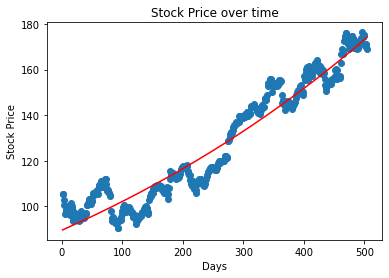

In [21]:
plt.scatter(ex_data_loglin['Day'],ex_data_loglin['Stock Price'])
plt.plot(ex_data_loglin['Day'], ex_prediction, 'red')
plt.title("Stock Price over time")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()


#### Task 8
##### Get the residuals and put them into a dataframe called `ex_loglin_results`, along with the actual values of `Stock Price` and the exponentiated predictions of `Stock Price`.
##### Using the RMSE function, get the RMSE of our log-lin model.


In [22]:
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())


#### Result:


In [23]:
actual = ex_data_loglin['Stock Price']
prediction = ex_prediction
residuals = actual - prediction
ex_loglin_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
print(rmse(ex_loglin_results['predicted'],ex_loglin_results['actual']))


6.834043044445937


#### Task 9
##### Build a standard linear model with the dataset, and get a plot of `actual vs.predicted`.
##### Compare the plot with our previous plot of the log-lin model.
##### Try calculating the RMSE for a more accurate comparison.
#### Result:


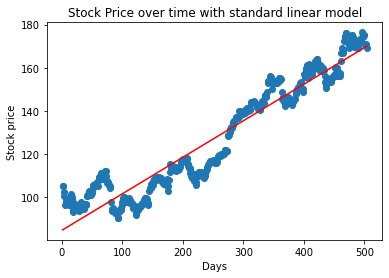

7.645477710537619


In [24]:
# Fit the model
model_lin = sm.OLS(ex_data_loglin['Stock Price'], ex_data_loglin.loc[:,['const','Day']]).fit()
prediction = model_lin.predict(ex_data_loglin.loc[:,['const','Day']])
plt.scatter(ex_data_loglin['Day'],ex_data_loglin['Stock Price'])
plt.plot(ex_data_loglin['Day'], prediction, 'red')
plt.title("Stock Price over time with standard linear model")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.show()
# We can't really see a big difference with the log-lin model. Let's calculate RMSE for a more accurate comparison.
actual = ex_data_loglin['Stock Price']
prediction = prediction
residuals = actual - prediction
ex_loglin_linear_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
print(rmse(ex_loglin_linear_results['predicted'], ex_loglin_linear_results['actual']))
# Now we can see that the log-lin model is better than the linear model given that the linear model RMSE is bigger, even if it's a slight difference.


#### Exercise 3
#### Task 1
##### Load `poly-data.csv` and save as `ex_data_poly`.
##### This is a dataset generated to show 150 data points exhibiting a polynomial relationship.
##### Check the shape of the data, print the first few rows, and check for any missing values. 
##### Sort the dataframe according to `x`.
#### Result:


In [29]:
ex_data_poly = pd.read_csv('poly-data.csv')
ex_data_poly.shape
ex_data_poly.head()
ex_data_poly.isnull().values.any()
ex_data_poly.sort_values(by = ['x'], inplace = True)


#### Task 2
##### Using `np.power()`, add two new predictors called `x2` and `x3`.
##### Print out the first few rows with the new predictors.
#### Result:


In [30]:
ex_data_poly['x2'] = np.power(ex_data_poly['x'], 2)
ex_data_poly['x3'] = np.power(ex_data_poly['x'], 3)
ex_data_poly.head()


,x,y,x2,x3
129,0.005676,-0.098644,0.000032,1.829024e-07
42,0.005998,1.091955,0.000036,2.157555e-07
108,0.012313,-0.202702,0.000152,1.866939e-06
141,0.016256,-0.389729,0.000264,4.295415e-06
140,0.018529,0.212417,0.000343,6.361774e-06


#### Task 3
##### Add a constant to our data and fit the model using `sm.OLS`. 
##### Name the fitted model as `ex_model_poly`.
#### Result:


In [31]:
ex_data_poly = sm.add_constant(ex_data_poly)
ex_data_poly.head()
ex_model_poly = sm.OLS(ex_data_poly['y'], ex_data_poly.loc[:,['const','x','x2','x3']]).fit()


#### Task 4
##### Using `ex_model_poly` model, predict the target using `x`, `x2`, and `x3` as predictors.
##### Save the predictions as `ex_prediction_poly`.
##### Print the first ten rows of the predictions.
#### Result:


In [32]:
ex_prediction_poly = ex_model_poly.predict(ex_data_poly.loc[:,['const','x','x2','x3']])
ex_prediction_poly[0:10]


129   -0.097369
42    -0.093715
108   -0.023304
141    0.019291
140    0.043389
96     0.302458
24     0.388395
91     0.444356
10     0.623348
29     0.640664
dtype: float64

#### Task 5
##### Create a plot that shows the actual values of `y` and the predicted values of `y`. 
##### Plot the actual points of `y` as scatter points and the predicted values of `y` as a red line. 
#### Result:


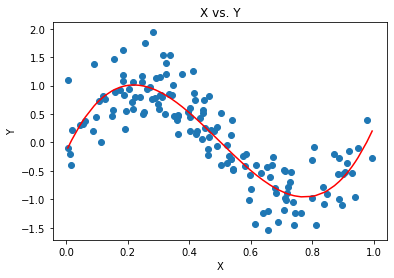

In [33]:
plt.scatter(ex_data_poly['x'],ex_data_poly['y'])
plt.plot(ex_data_poly['x'], ex_prediction_poly, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#### Task 6
##### Get the residuals and put them into a dataframe called `ex_poly_results`, along with the actual values of `y` and the predictions of `y`.
##### Using the RMSE function, get the RMSE of our polynomial model.


In [34]:
def rmse(predictions,actual):
    return np.sqrt(((prediction - actual) ** 2).mean())
  


#### Result:  


In [35]:
actual = ex_data_poly['y']
prediction = ex_prediction_poly
residuals = actual - prediction
ex_poly_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
                              
rmse(ex_poly_results['predicted'], ex_poly_results['actual'])


0.37673434352080615

#### Task 7
##### Build a standard linear model and plot `actual vs predicted` to see how the model would have performed.
##### Compare this plot with the previous plot we made with polynomial terms added in.
#### Result:


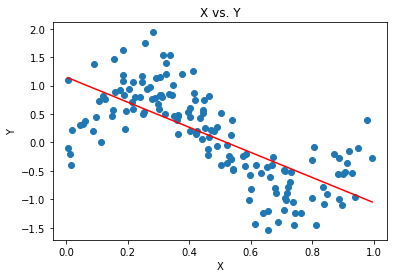

In [36]:
# Fit the model
model_lin = sm.OLS(ex_data_poly['y'], ex_data_poly.loc[:,['const','x']]).fit()
prediction = model_lin.predict(ex_data_poly.loc[:,['const','x']])
plt.scatter(ex_data_poly['x'],ex_data_poly['y'])
plt.plot(ex_data_poly['x'], prediction, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#### Exercise 4
#### Task 1
##### Load the `interaction-data.csv` as `ex_interaction`. 
##### This is a dataset that predicts `Income` with `Illiteracy` and `High School Graduate Percentage` as predictors.
##### Check the shape of `ex_interaction` and print the first few rows to see what the dataset looks like. 
##### Check if there are any missing values in the dataset. 
#### Result:


In [38]:
ex_interaction = pd.read_csv('interaction-data.csv')
ex_interaction.shape
ex_interaction.head()
ex_interaction.isnull().values.any()


False

#### Task 2
##### Add the interaction term between `Illiteracy` and `HS Grad` as `illiteracy:hsgrad`.
##### Take a look at the first few rows again.
#### Result:


In [39]:
ex_interaction['illiteracy:hsgrad'] = ex_interaction['Illiteracy'] * ex_interaction['HS Grad']
ex_interaction.head()


,Income,Illiteracy,HS Grad,illiteracy:hsgrad
0,3624,2.1,41.3,86.73
1,6315,1.5,66.7,100.05
2,4530,1.8,58.1,104.58
3,3378,1.9,39.9,75.81
4,5114,1.1,62.6,68.86


#### Task 3
##### Add a constant to the dataframe and fit the model with `Income` as the target variable and the rest of the variables as predictors.
##### Name the model as `ex_model_interact`.
#### Result:


In [40]:
ex_interaction = sm.add_constant(ex_interaction)
ex_model_interact = sm.OLS(ex_interaction['Income'], ex_interaction.loc[:, ['const', 'Illiteracy', 'HS Grad', 'illiteracy:hsgrad']]).fit()


#### Task 4
##### Using the fitted model, predict using the same variables as predictors.
##### Name the predictions as `ex_prediction_interact` and take a look at the first 10 rows of the prediction.
#### Result:


In [41]:
ex_prediction_interact = ex_model_interact.predict(ex_interaction.loc[:,['const','Illiteracy','HS Grad','illiteracy:hsgrad']])
ex_prediction_interact[0:10]


0    3685.379693
1    5279.695256
2    4928.555613
3    3694.678020
4    4880.432683
5    4702.781546
6    4674.796122
7    4610.719855
8    4570.260191
9    3686.693648
dtype: float64

#### Task 5
##### Evaluate the model using the defined RMSE function.


In [42]:
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())


#### Result:


In [43]:
actual = ex_interaction['Income']
prediction = ex_prediction_interact
residuals = actual - prediction
ex_interact_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
print(rmse(ex_interact_results['predicted'],ex_interact_results['actual']))


429.2036945597498


#### Task 6
##### How would the model have performed if we did not add the interaction term?
##### Build a new model without the interaction term and calculate the RMSE. 
#### Result:


In [44]:
model_interaction = sm.OLS(ex_interaction['Income'], ex_interaction.loc[:,['const','Illiteracy','HS Grad']]).fit()
prediction_interaction = model_interaction.predict(ex_interaction.loc[:,['const','Illiteracy','HS Grad']])
actual = ex_interaction['Income']
prediction = prediction_interaction
residuals = actual - prediction
interaction_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
print(round(rmse(interaction_results['predicted'],interaction_results['actual'])))


477
